<a href="https://colab.research.google.com/github/DaniyalK03/PML/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework D

**Submission by SN: 21015796**

##Introduction

The following notebook is submitted coursework D for PHAS0056.

This notebook compares the testing accuracy of various neural network.

The first model has been trained on the MNIST training dataset and the testing accuracy is tested on the N-best PCA components from the MNIST testing dataset.

The second model has been trained on the 100 best PCA components taken from the MNIST training dataset and the testing accuracy is also tested on the N-best PCA components from the MNIST testing dataset.

The third model has been trained on the 20 best PCA components taken from the MNIST training dataset and the testing accuracy is also tested on the N-best PCA components from the MNIST testing dataset.

The findings indicate that an optimum number of PCAs can be determined to train the network such that the model would still return high testing accuracies over a wider PCA range.

The following code is adapted and structured similar to example notebook [1] and self submission [2].

*Bibliography*

[1] R. Nichol, "Week5_PCA.ipynb", UCL, PHAS:0056, 2024

[2] D.Khan, "Week4_MNIST_CNN.ipynb". UCL, PHAS:0056, 2024

In [ ]:
###############################################################################

# Importing necessary backend modules and libraries
# Same backend from [1]

import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=100 # Image Size

#Useful for debugging problems
print(tf.__version__)

2.15.0


In [ ]:
# Unloading MNIST image dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Setting up a convolutional neural network [2]
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(27, (3, 3), activation='relu',input_shape=(28,28,1))) #, input_shape=(28, 28, 1))) # 27 kernals, each 3x3 for the convolutional layer with input of a layer of 28x28 pixels
model.add(keras.layers.MaxPooling2D((2, 2))) # Pooling data using a 2x2 matrix and taking the maximum value to make data more manageable

model.add(keras.layers.Flatten()) # Flattening the arrays processed thus far
model.add(keras.layers.Dense(16, activation='relu')) # Regular dense layer of 16 neurons
model.add(keras.layers.Dense(10)) # 10 output neurons corresponding to the digit labels
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 27)        270       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 27)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4563)              0         
                                                                 
 dense (Dense)               (None, 16)                73024     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 73464 (286.97 KB)
Trainable params: 73464 (286.97 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
# Compiling model using adam for optimum accuracy and computing efficiency [2]
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Training model on the train images and comparing to validation data [2]
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2349 - accuracy: 0.9324 - val_loss: 0.1022 - val_accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0837 - accuracy: 0.9750 - val_loss: 0.0752 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.0598 - val_accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0527 - val_accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0520 - val_accuracy: 0.9824


313/313 - 1s - loss: 0.0520 - accuracy: 0.9824 - 1s/epoch - 4ms/step


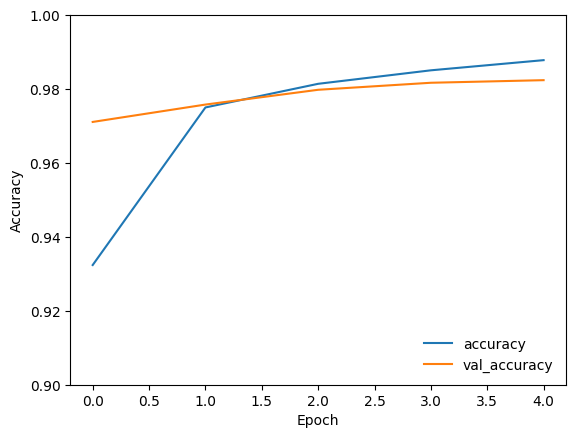

In [ ]:
# Plotting accuracy for the first model [2]
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.90, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) # Testing on testing dataset

When this model is trained on the MNIST training dataset and tested on the MNIST testing dataset, it reaches a final accuracy of >95%.

In [ ]:
# Determining the varaince of the N-th PCA from the training dataset [1]

print("train_images.shape: ",np.shape(train_images))
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))
mu=np.mean(X,axis=0)
x=X-mu
#rho=np.dot(np.transpose(x),x)  # ALTERNATIVE: Make the covaraince matrix by hand
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
print("rho.shape:",np.shape(rho))

#Get the eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs)
vals=np.flip(vals)


train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


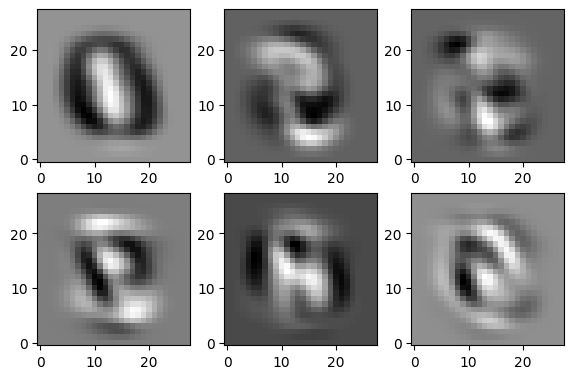

In [ ]:
# Plotting the eigenvectors of the dataset [1]

fig,ax=plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(np.reshape(vecs[:,(i+j*3)],[28,28]), origin='lower',cmap='binary',interpolation='nearest')
plt.subplots_adjust(left=0.05,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.2)  #Adjust the space between the subplots so there isn't acres of whitespace

(784,)


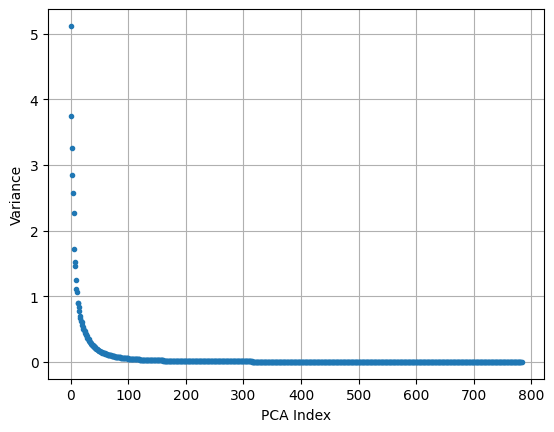

In [ ]:
# Plotting the variance of the eigenvalues for up to the N-th PCA [1]

print(np.shape(vals))
fig,ax=plt.subplots()
index=np.arange((np.shape(vals)[0]))
ax.plot(index,vals.real,".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("Variance")
ax.grid()

This initial extrema implies that roughly the first 100 PCA components contain most of the necessary information with remaining components adding little, if any, valuable information needed for reproduction.

In [ ]:
def Test_on_N(images, model):

  """
  Inputs: images = Array of testing images
          model = Trained model that will be trained

  Outputs:Plot of testing accuracy vs N

  This function takes a dataset of testing images and decomposes them into PCA components. A previously trained model is tested for accuracy up to the N-th PCA component. The results are plotted.
  """

  X=np.reshape(images,(len(images),28,28,1)) # 10000 images, 28 x 28, 1 channel
  mu=np.mean(X,axis=0)
  x=X-mu

  rho=np.cov(x.reshape(len(x), -1),rowvar=False) # Make the covaraince matrix by np.cov, dimensions 10000, 784

  values,vectors=linalg.eigh(rho)

  vectors=np.flip(vectors)
  values=np.flip(values)



  PCA_increments = np.array([2, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 784]) # Incriments at which to test accuracy for N PCA components
  Pval=np.dot(x.reshape(len(x), -1),vectors) # 10000, 784 reshape to dot with vector array
  test_array = np.empty(len(PCA_increments)) # Initialise empty array to insert testing values into


  for i in range(len(PCA_increments)):
    newImage=(np.dot(Pval[:,0:PCA_increments[i]],vectors.T[0:PCA_increments[i],:])) # Reproduced image up to the N-th PCA component

    newImage = np.reshape(newImage, (-1, 28, 28, 1)) + np.reshape(mu, (1, 28, 28, 1)) # Needs to be 28x28 to fit into Neural network as per the input shape

    test_loss, test_acc = model.evaluate(newImage, test_labels, verbose = 2) # Testing accuracy
    test_array[i] = test_acc # Add to array to plot

  # Labelling and plotting testing accuracy against PCA components
  plt.plot(PCA_increments,test_array,marker = "o",label='accuracy')
  plt.xlabel('N')
  plt.ylabel('Test Accuracy')
  plt.legend(loc='best')

  return ()


313/313 - 2s - loss: 2.9727 - accuracy: 0.1598 - 2s/epoch - 6ms/step
313/313 - 2s - loss: 2.3697 - accuracy: 0.3573 - 2s/epoch - 7ms/step
313/313 - 1s - loss: 1.4602 - accuracy: 0.5933 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 1.0063 - accuracy: 0.7076 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.6148 - accuracy: 0.8103 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.4213 - accuracy: 0.8650 - 1s/epoch - 4ms/step
313/313 - 2s - loss: 0.1262 - accuracy: 0.9609 - 2s/epoch - 7ms/step
313/313 - 1s - loss: 0.0876 - accuracy: 0.9722 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0721 - accuracy: 0.9765 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 0.0647 - accuracy: 0.9791 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0592 - accuracy: 0.9800 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 0.0563 - accuracy: 0.9815 - 2s/epoch - 7ms/step
313/313 - 1s - loss: 0.0553 - accuracy: 0.9814 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0539 - accuracy: 0.9819 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0526 - accu

()

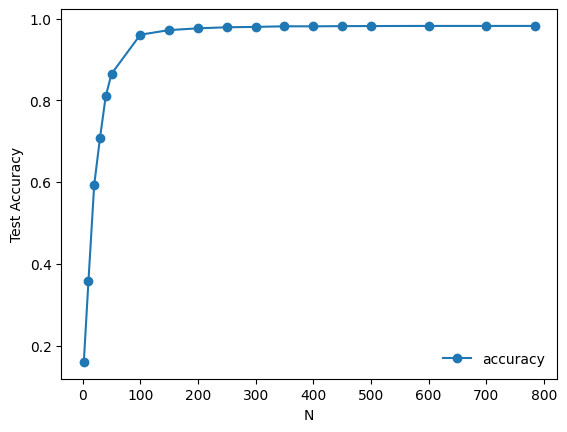

In [ ]:
# Testing first model across N-best PCA datest
Test_on_N(test_images, model)

It can be noted that a high accuracy is reached with all PCA components tested with the first model.

In [ ]:
# PCA decomposition for training images [1]

X_train=np.reshape(train_images,(len(train_images),28,28,1)) # 10000, 28 x 28, 1 channel
mu_train=np.mean(X_train,axis=0)
x_train=X_train-mu_train

rho_train=np.cov(x_train.reshape(len(x_train), -1),rowvar=False) # Make the covaraince matrix by np.cov # 10000, 784

values_train,vectors_train=linalg.eigh(rho_train)

vectors_train=np.flip(vectors_train)
values_train=np.flip(values_train)

P_train=np.dot(x_train.reshape(len(x_train), -1),vectors_train) # 10000, 784 reshape to dot with vector array

newImage_train100=(np.dot(P_train[:,0:100],vectors_train.T[0:100,:])) # Training image dataset using the 100 best PCA components

newImage_train100 = np.reshape(newImage_train100, (-1, 28, 28, 1)) + np.reshape(mu_train, (1, 28, 28, 1)) # Needs to be 28x28 to fit into neural network as per the input shape


In [ ]:

# Setting up a second new convolutional neural network [2]

model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(27, (3, 3), activation='relu',input_shape=(28,28,1))) #, input_shape=(28, 28, 1))) # 27 kernals, each 3x3 for the first convolutional layer with input of a layer of 28x28 pixels
model2.add(keras.layers.MaxPooling2D((2, 2))) # Pooling data using a 2x2 matrix and taking the maximum value to make data more manageable

model2.add(keras.layers.Flatten()) # Flattening the arrays processed thus far
model2.add(keras.layers.Dense(16, activation='relu')) # Regular dense layer of 16 neurons
model2.add(keras.layers.Dense(10)) # 10 output neurons corresponding to the digit labels

#model2.summary() # Optional if viewer wishes to observe model layers

In [ ]:
# Compiling model using adam for optimum accuracy and computing efficiency [2]
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training using the dataset of the 100 best PCA components
history2 = model2.fit(newImage_train100, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3355 - accuracy: 0.8944 - val_loss: 0.1360 - val_accuracy: 0.9552
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1002 - accuracy: 0.9699 - val_loss: 0.0867 - val_accuracy: 0.9726
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0810 - val_accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0639 - accuracy: 0.9802 - val_loss: 0.0852 - val_accuracy: 0.9743
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0887 - val_accuracy: 0.9741


313/313 - 1s - loss: 2.3008 - accuracy: 0.2500 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 1.2852 - accuracy: 0.5628 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.5798 - accuracy: 0.8067 - 1s/epoch - 4ms/step
313/313 - 2s - loss: 0.2589 - accuracy: 0.9191 - 2s/epoch - 8ms/step
313/313 - 1s - loss: 0.1484 - accuracy: 0.9552 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.1026 - accuracy: 0.9686 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0593 - accuracy: 0.9808 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0675 - accuracy: 0.9783 - 1s/epoch - 4ms/step
313/313 - 3s - loss: 0.0740 - accuracy: 0.9765 - 3s/epoch - 9ms/step
313/313 - 1s - loss: 0.0776 - accuracy: 0.9758 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0791 - accuracy: 0.9763 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0812 - accuracy: 0.9761 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 0.0836 - accuracy: 0.9753 - 2s/epoch - 7ms/step
313/313 - 1s - loss: 0.0856 - accuracy: 0.9748 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 0.0874 - accu

()

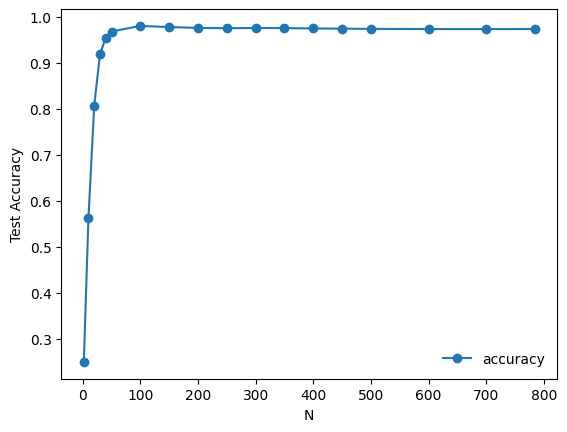

In [ ]:
# Testing second model across N-best PCA datest
Test_on_N(test_images, model2)

The second model performs well at a high accuracy reached across all PCA components even though only 100 PCA components were used for training. The accuracy is almost identical to the first model when tested across all PCAs.

In [ ]:
newImage_train20=(np.dot(P_train[:,0:20],vectors_train.T[0:20,:])) # Training image dataset using the 20 best PCA components

newImage_train20 = np.reshape(newImage_train20, (-1, 28, 28, 1)) + np.reshape(mu_train, (1, 28, 28, 1)) # Needs to be 28x28 to fit into neural network as per the input shape

In [ ]:
# Setting up a third new convolutional neural network [2]

model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(27, (3, 3), activation='relu',input_shape=(28,28,1))) #, input_shape=(28, 28, 1))) # 27 kernals, each 3x3 for the first convolutional layer with input of a layer of 28x28 pixels
model3.add(keras.layers.MaxPooling2D((2, 2))) # Pooling data using a 2x2 matrix and taking the maximum value to make data more manageable

model3.add(keras.layers.Flatten()) # Flattening the arrays processed thus far
model3.add(keras.layers.Dense(16, activation='relu')) # Regular dense layer of 16 neurons
model3.add(keras.layers.Dense(10)) # 10 output neurons corresponding to the digit labels
#model3.summary() # Optional if viewer wishes to observe model layers

In [ ]:
# Compiling model using adam for optimum accuracy and computing efficiency [2]
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training using the dataset of the 20 best PCA components
history3 = model3.fit(newImage_train20, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3930 - accuracy: 0.8776 - val_loss: 0.6868 - val_accuracy: 0.7772
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1911 - accuracy: 0.9419 - val_loss: 0.6895 - val_accuracy: 0.7857
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1559 - accuracy: 0.9524 - val_loss: 0.6854 - val_accuracy: 0.8000
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1370 - accuracy: 0.9577 - val_loss: 0.5910 - val_accuracy: 0.8252
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1237 - accuracy: 0.9621 - val_loss: 0.7282 - val_accuracy: 0.8090


313/313 - 2s - loss: 3.6707 - accuracy: 0.1238 - 2s/epoch - 6ms/step
313/313 - 2s - loss: 0.8943 - accuracy: 0.6849 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 0.1449 - accuracy: 0.9553 - 2s/epoch - 5ms/step
313/313 - 1s - loss: 0.2455 - accuracy: 0.9255 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 0.3336 - accuracy: 0.8956 - 1s/epoch - 4ms/step
313/313 - 2s - loss: 0.4124 - accuracy: 0.8814 - 2s/epoch - 5ms/step
313/313 - 1s - loss: 0.5281 - accuracy: 0.8502 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.6017 - accuracy: 0.8330 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.6589 - accuracy: 0.8219 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.6928 - accuracy: 0.8157 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 0.7097 - accuracy: 0.8109 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 0.7285 - accuracy: 0.8084 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.7357 - accuracy: 0.8070 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.7380 - accuracy: 0.8068 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.7331 - accu

()

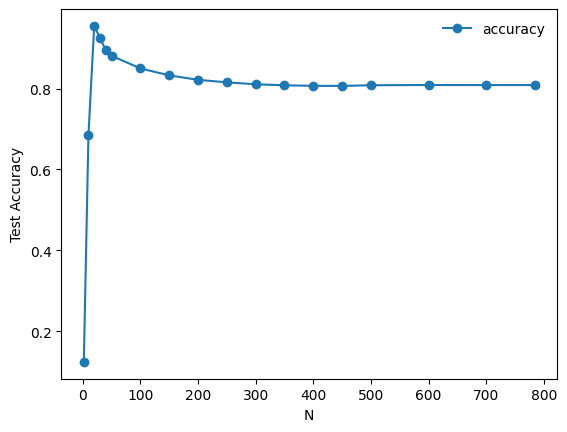

In [ ]:
# Testing third model across N-best PCA datest
Test_on_N(test_images, model3)

The third model reaches a high testing accuracy of approximately 95% when tested up to the 20 best PCA components yet the accuracy decreases when generalising to across all the testing PCA componments.

Overall, it can be concluded that models trained on too few PCA components (even those that may contain the most "useful" information) may fail to generalise when tested across all PCA components of a dataset - as observed with the testing accuracy of the third model trained on 20 best PCA components.

It is nonetheless possible to achieve nearly identical testing accuracies to models trained on the full range of PCA components, by training models on a fair amount of high variance PCA components and some less "informative" PCA components - as observed with the second model trained on 100 best PCA components.



Provided a suitable number of best PCA components from the total components are used in the training, high testing accuracy for reproduction can be achieved, though too few, high variance should be avoided for generalisation.